In [3]:
pip install seaborn

     |████████████████████████████████| 292 kB 13.6 MB/s eta 0:00:01    |██████████                      | 92 kB 14.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
# 라이브러리 임포트
import os
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch import autograd
from torch.utils import data
from torch.optim import Adam
from torchvision import datasets, transforms
import torchvision.models as models
import seaborn as sns
import matplotlib.pyplot as plt

# 시간별 예측이 아닌 하루교통량 예측

In [2]:
DATASET_PATH = os.path.join('/USER/week2/data/day')
df =pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))
df_val = pd.read_csv(os.path.join(DATASET_PATH, 'validate.csv'))
df_test = pd.read_csv(os.path.join(DATASET_PATH, 'test.csv'))

In [3]:
df

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,5006706,1607813,216087,481235,182757,115300,2316399,130114,516721,...,108535,234214,553083,270659,139350,334162,66950,267826,162546,366594
1,20200102,5390294,1638834,165724,403004,152083,104069,2227595,113220,263870,...,123915,263751,695526,348094,103901,339314,69792,311813,172577,346672
2,20200103,6079899,1777802,190067,473078,166017,122349,2499240,121370,294028,...,144580,272906,677219,371390,120859,392128,72021,349457,190175,377754
3,20200104,5725885,1743939,193869,510606,179314,118473,2597776,124013,379395,...,138880,266273,569333,330755,117240,388329,74954,320370,178774,372421
4,20200105,5180150,1545929,172876,483723,150186,107015,2355430,113277,366770,...,114246,239678,507174,272263,126264,336935,62068,270039,148609,312512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,20200513,5427421,1624291,167447,422851,162437,112811,2257296,101235,254603,...,123969,282051,671596,292582,103790,362432,65343,329423,206451,344123
134,20200514,5595033,1661805,172299,441314,163331,116983,2340831,107113,264905,...,131894,289938,666188,377794,107637,378173,57639,322832,220254,356759
135,20200515,5729067,1663937,171382,429070,149141,121189,2437721,109341,265837,...,130855,288363,639007,352267,114330,399211,44549,319609,212776,346983
136,20200516,5719070,1834329,206927,532645,196345,146078,2805512,120483,373552,...,137992,290508,607064,339408,159402,424661,72791,319778,218720,378043


<Figure size 720x576 with 0 Axes>

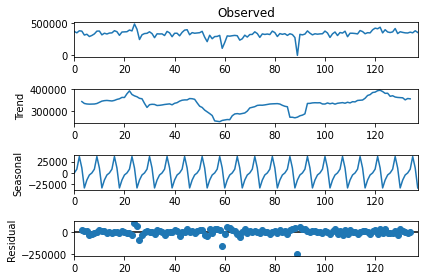

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
stl = seasonal_decompose(df['6000'].values,period=7)
plt.figure(figsize=(10,8))
stl.plot()
plt.show()



In [5]:
df_val.head()

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200511,5578971,1643620,172303,427053,157504,114690,2310430,104894,254831,...,126437,292803,651045,372190,109236,372551,64108,323865,210709,353406
1,20200512,5482511,1641340,170999,421349,161397,109167,2236566,103518,247298,...,126489,288107,660569,376510,103625,358872,65378,325197,215740,346273
2,20200513,5427421,1624291,167447,422851,162437,112811,2257296,101235,254603,...,123969,282051,671596,292582,103790,362432,65343,329423,206451,344123
3,20200514,5595033,1661805,172299,441314,163331,116983,2340831,107113,264905,...,131894,289938,666188,377794,107637,378173,57639,322832,220254,356759
4,20200515,5729067,1663937,171382,429070,149141,121189,2437721,109341,265837,...,130855,288363,639007,352267,114330,399211,44549,319609,212776,346983


In [6]:
df_test.head()

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200518,5414927,1616224,160042,420497,155643,108262,2143043,102193,260381,...,115393,285299,626147,357789,98551,359719,64671,328328,207696,338499
1,20200519,5321819,1596591,156793,390913,146727,100493,2054820,101802,236535,...,122338,286149,628905,362986,90122,335649,60189,314184,211522,342203
2,20200520,5723998,1642052,167059,425614,162702,113903,2340633,103840,254186,...,126863,285937,670811,381393,104193,364633,60124,330555,213080,345258
3,20200521,5812909,1659759,124990,391667,126316,88922,2385279,104596,256034,...,124596,292198,617016,376283,109318,373005,43950,331997,217786,351592
4,20200522,6468907,1946794,211148,527491,183672,146548,2909164,121324,314295,...,153945,316251,633065,385027,143285,426041,49410,359638,243020,399716


###  하루로 합산한 교통량 데이터 만들기

In [148]:
# df_day=df.groupby(['날짜']).sum()

In [153]:
# df_day.drop(['시간'],axis=1,inplace=True)

In [155]:
# df_day.reset_index(inplace=True)

In [198]:
# df_day

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,5006706,1607813,216087,481235,182757,115300,2316399,130114,516721,...,108535,234214,553083,270659,139350,334162,66950,267826,162546,366594
1,20200102,5390294,1638834,165724,403004,152083,104069,2227595,113220,263870,...,123915,263751,695526,348094,103901,339314,69792,311813,172577,346672
2,20200103,6079899,1777802,190067,473078,166017,122349,2499240,121370,294028,...,144580,272906,677219,371390,120859,392128,72021,349457,190175,377754
3,20200104,5725885,1743939,193869,510606,179314,118473,2597776,124013,379395,...,138880,266273,569333,330755,117240,388329,74954,320370,178774,372421
4,20200105,5180150,1545929,172876,483723,150186,107015,2355430,113277,366770,...,114246,239678,507174,272263,126264,336935,62068,270039,148609,312512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,20200513,5427421,1624291,167447,422851,162437,112811,2257296,101235,254603,...,123969,282051,671596,292582,103790,362432,65343,329423,206451,344123
134,20200514,5595033,1661805,172299,441314,163331,116983,2340831,107113,264905,...,131894,289938,666188,377794,107637,378173,57639,322832,220254,356759
135,20200515,5729067,1663937,171382,429070,149141,121189,2437721,109341,265837,...,130855,288363,639007,352267,114330,399211,44549,319609,212776,346983
136,20200516,5719070,1834329,206927,532645,196345,146078,2805512,120483,373552,...,137992,290508,607064,339408,159402,424661,72791,319778,218720,378043


In [297]:
# df_day.to_csv('train_day.csv',index=False)

In [301]:
# df_val=df_val.groupby(['날짜']).sum()

In [304]:
# df_val.drop(['시간'],axis=1,inplace=True)

In [306]:
# df_val.reset_index(inplace=True)

In [308]:
# df_val.to_csv('valid_day.csv',index=False)

In [310]:
# df_test = df_test.groupby(['날짜']).sum()
# df_test.drop(['시간'],axis=1,inplace=True)
# df_test.reset_index(inplace=True)
# df_test.to_csv('test_day.csv',index=False)

In [8]:
timestamps = list(df['날짜'])

In [9]:
len(timestamps)

138

In [10]:
categories = df.columns.values.tolist()[1:]

In [11]:
len(categories)

35

In [134]:
df['10'][137]

5433529

In [12]:
from sklearn.preprocessing import MinMaxScaler



# scaler = MinMaxScaler()

# df = scaler.fit_transform(df[categories])
# df = pd.DataFrame(df)

In [12]:
df

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,5006706,1607813,216087,481235,182757,115300,2316399,130114,516721,...,108535,234214,553083,270659,139350,334162,66950,267826,162546,366594
1,20200102,5390294,1638834,165724,403004,152083,104069,2227595,113220,263870,...,123915,263751,695526,348094,103901,339314,69792,311813,172577,346672
2,20200103,6079899,1777802,190067,473078,166017,122349,2499240,121370,294028,...,144580,272906,677219,371390,120859,392128,72021,349457,190175,377754
3,20200104,5725885,1743939,193869,510606,179314,118473,2597776,124013,379395,...,138880,266273,569333,330755,117240,388329,74954,320370,178774,372421
4,20200105,5180150,1545929,172876,483723,150186,107015,2355430,113277,366770,...,114246,239678,507174,272263,126264,336935,62068,270039,148609,312512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,20200513,5427421,1624291,167447,422851,162437,112811,2257296,101235,254603,...,123969,282051,671596,292582,103790,362432,65343,329423,206451,344123
134,20200514,5595033,1661805,172299,441314,163331,116983,2340831,107113,264905,...,131894,289938,666188,377794,107637,378173,57639,322832,220254,356759
135,20200515,5729067,1663937,171382,429070,149141,121189,2437721,109341,265837,...,130855,288363,639007,352267,114330,399211,44549,319609,212776,346983
136,20200516,5719070,1834329,206927,532645,196345,146078,2805512,120483,373552,...,137992,290508,607064,339408,159402,424661,72791,319778,218720,378043


In [59]:
df = pd.DataFrame(df)

In [215]:
df[130:]

,날짜,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
130,20200510,5611223,1753615,196961,549132,175299,138709,2774139,122574,396411,...,146760,277937,494589,287525,169350,399783,66650,294914,200323,362917
131,20200511,5578971,1643620,172303,427053,157504,114690,2310430,104894,254831,...,126437,292803,651045,372190,109236,372551,64108,323865,210709,353406
132,20200512,5482511,1641340,170999,421349,161397,109167,2236566,103518,247298,...,126489,288107,660569,376510,103625,358872,65378,325197,215740,346273
133,20200513,5427421,1624291,167447,422851,162437,112811,2257296,101235,254603,...,123969,282051,671596,292582,103790,362432,65343,329423,206451,344123
134,20200514,5595033,1661805,172299,441314,163331,116983,2340831,107113,264905,...,131894,289938,666188,377794,107637,378173,57639,322832,220254,356759
135,20200515,5729067,1663937,171382,429070,149141,121189,2437721,109341,265837,...,130855,288363,639007,352267,114330,399211,44549,319609,212776,346983
136,20200516,5719070,1834329,206927,532645,196345,146078,2805512,120483,373552,...,137992,290508,607064,339408,159402,424661,72791,319778,218720,378043
137,20200517,5433529,1755096,196887,569619,186121,141274,2559386,118188,412566,...,127397,267807,476275,277928,166177,388576,66813,289310,194203,352282


In [14]:
input_data = []
output_data = []

input_data, output_data 어떻게 들어가는지 확인

In [15]:
for t in range(len(timestamps)-7):
    temp_input_data = []
    temp_output_data = []
    for col in categories:
        road = df[col].tolist()         
        inp = [float(i) for i in road[t:t+7]]      # input 데이터 시계열 구간 설정
        outp = [float(j) for j in road[t+7:t+2*7]]      # output 데이터 시계열 구간 설정
        temp_input_data.append(inp) 
        temp_output_data.append(outp)
    input_data.append(temp_input_data)
    output_data.append(temp_output_data)

In [16]:
input_data[130]

[[5611223.0, 5578971.0, 5482511.0, 5427421.0, 5595033.0, 5729067.0, 5719070.0],
 [1753615.0, 1643620.0, 1641340.0, 1624291.0, 1661805.0, 1663937.0, 1834329.0],
 [196961.0, 172303.0, 170999.0, 167447.0, 172299.0, 171382.0, 206927.0],
 [549132.0, 427053.0, 421349.0, 422851.0, 441314.0, 429070.0, 532645.0],
 [175299.0, 157504.0, 161397.0, 162437.0, 163331.0, 149141.0, 196345.0],
 [138709.0, 114690.0, 109167.0, 112811.0, 116983.0, 121189.0, 146078.0],
 [2774139.0, 2310430.0, 2236566.0, 2257296.0, 2340831.0, 2437721.0, 2805512.0],
 [122574.0, 104894.0, 103518.0, 101235.0, 107113.0, 109341.0, 120483.0],
 [396411.0, 254831.0, 247298.0, 254603.0, 264905.0, 265837.0, 373552.0],
 [161281.0, 149165.0, 148235.0, 148142.0, 151759.0, 162226.0, 161697.0],
 [1277026.0, 1148305.0, 1125416.0, 1131472.0, 1154121.0, 1190904.0, 1355929.0],
 [321140.0, 280022.0, 277350.0, 276708.0, 280189.0, 288189.0, 314055.0],
 [589208.0, 489301.0, 466557.0, 469783.0, 493558.0, 535793.0, 549172.0],
 [386633.0, 318271.0, 3

In [17]:
output_data[124]

[[5578971.0, 5482511.0, 5427421.0, 5595033.0, 5729067.0, 5719070.0, 5433529.0],
 [1643620.0, 1641340.0, 1624291.0, 1661805.0, 1663937.0, 1834329.0, 1755096.0],
 [172303.0, 170999.0, 167447.0, 172299.0, 171382.0, 206927.0, 196887.0],
 [427053.0, 421349.0, 422851.0, 441314.0, 429070.0, 532645.0, 569619.0],
 [157504.0, 161397.0, 162437.0, 163331.0, 149141.0, 196345.0, 186121.0],
 [114690.0, 109167.0, 112811.0, 116983.0, 121189.0, 146078.0, 141274.0],
 [2310430.0, 2236566.0, 2257296.0, 2340831.0, 2437721.0, 2805512.0, 2559386.0],
 [104894.0, 103518.0, 101235.0, 107113.0, 109341.0, 120483.0, 118188.0],
 [254831.0, 247298.0, 254603.0, 264905.0, 265837.0, 373552.0, 412566.0],
 [149165.0, 148235.0, 148142.0, 151759.0, 162226.0, 161697.0, 161008.0],
 [1148305.0, 1125416.0, 1131472.0, 1154121.0, 1190904.0, 1355929.0, 1239243.0],
 [280022.0, 277350.0, 276708.0, 280189.0, 288189.0, 314055.0, 309167.0],
 [489301.0, 466557.0, 469783.0, 493558.0, 535793.0, 549172.0, 589644.0],
 [318271.0, 303394.0, 3

## 하루교통량을 일주일씩 예측 위해 베이스라인 코드 수정

In [30]:
class CustomDataset(data.Dataset):      # torch.utils.data.Dataset 클래스의 상속 클래스 CustomDataset class 생성. 상속 클래스 생성시 __init__, __getitem__, __len__함수는 기본적으로 정의해줘야 함.
    
    def __init__(self, root, seq_len, batch_size=64, phase='train'):      # 데이터 로드 단계에 사용될 여러 변수들을 'self.변수명'의 형태로 지정해두는 함수
        
        self.root = root      # CustomDataset 객체 생성 시 데이터 경로 앞부분(공통 부분)을 root로 입력받아 저장
        self.phase = phase      # CustomDataset 객체 생성 시 데이터 경로 뒷부분(train/validate/test)을 phase로 입력받아 저장
        self.label_path = os.path.join(self.root, self.phase + '.csv')      # 데이터 전체 경로 생성
        df = pd.read_csv(self.label_path)      # 생성한 데이터 전체 경로로부터 데이터 로드
        
        self.seq_len = seq_len      # 일 단위 기간을 입력 받은 후 시간 단위 기간으로 변환하여 저장
        self.batch_size = batch_size
        self.labels = {}
        
        timestamps = list(df['날짜'])      # 날짜와 시간 정보가 튜플로 들어 있는 리스트 생성
        categories = df.columns.values.tolist()[1:]      # 도로명 column list 생성
        
        if self.phase == 'train':
            # scaler = MinMaxScaler()
            # df = scaler.fit_transform(df[categories]) #scaler 적용
            df = pd.DataFrame(df[categories])
            df.columns = categories
        
        input_data = []
        output_data = []
        
        for t in range(len(timestamps)):
            temp_input_data = []
            temp_output_data = []
            for col in categories:
                road = df[col].tolist()        
                inp = [float(i) for i in road[t:t+self.seq_len]]      # input 데이터 시계열 구간 설정
                outp = [float(j) for j in road[t+self.seq_len:t+2*self.seq_len]]      # output 데이터 시계열 구간 설정
                temp_input_data.append(inp) 
                temp_output_data.append(outp)
            input_data.append(temp_input_data)
            output_data.append(temp_output_data)
            
# input_data : [[첫번째 input 기간 동안의 첫번째 도로의 통행량 list, ..., 첫번째 input 기간 동안의 35번째 도로의 통행량 list], ...,
#               [마지막 input 기간 동안의 첫번째 도로의 통행량 list, ..., 마지막 input 기간 동안의 35번째 도로의 통행량 list]]
# output_data : [[첫번째 output 기간 동안의 첫번째 도로의 통행량 list, ..., 첫번째 output 기간 동안의 35번째 도로의 통행량 list], ...,
#                [마지막 output 기간 동안의 첫번째 도로의 통행량 list, ..., 마지막 output 기간 동안의 35번째 도로의 통행량 list]]
        
        self.labels['timestamp'] = timestamps
        self.labels['category'] = categories
        self.labels['input'] = input_data
        self.labels['output'] = output_data

    def __getitem__(self, index):      # index를 가지고 데이터를 하나씩 불러올 수 있게 하는 함수

#         데이터 내 index가 부여되는 형태

#                 | road_1    road_2    ...  road_35
#                -------------------------------------
#         time_1  | index_0   index_1   ...  index_34  전체데이터의개수
#         time_2  | index_35  index_36  ...  index_69

        row = index // 35      # index를 35(도로수)로 나눈 몫  ex) 71//35 -> 2
        col = index % 35      # index를 35(도로수)로 나눈 나머지  ex) 71%35 -> 1

        timestamp = self.labels['timestamp'][row]      # (날짜, 시간) 튜플이 들어있는 list에서 row번째 시점에 해당하는 튜플
        category = self.labels['category'][col]      # 도로명 column list에서 col번째 도로에 해당하는 element
        
        input_data = torch.tensor(self.labels['input'][row][col])      # input_data list에서, row번째 시점의 col번째 도로 교통량 정보

        if self.phase != 'test':
            output_data = torch.tensor(self.labels['output'][row][col])
        else:
            output_data = []

        return timestamp, category, (input_data, output_data)

    def __len__(self):      # getitem 함수를 통해 데이터를 불러오려면,전체 index 길이를 알아야 한다.
        return (len(self.labels['timestamp'])-(self.seq_len*2)+1) * 35      # 특정 시점이 아닌 특정 기간을 하나의 data 단위로 설정하면, 전체 샘플 수는 감소함을 반영 


def data_loader(root, phase='train', batch_size=64, seq_len=7, drop_last=False):
    if phase == 'train':
        shuffle = True
    else:
        shuffle = False

    dataset = CustomDataset(root, seq_len, batch_size, phase)
    dataloader = data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)

    return dataloader

In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class LSTMNet(nn.Module):
    def __init__(self,
                 input_size=7,      # input 길이는 168시간(7일 X 24시간)
                 hidden_size=1024,
                 output_size=7,      # output 길이는 168시간(7일 X 24시간)
                 batch_size=64,
                 num_layers=3,
                 dropout=0,
                 batch_first=False):      # batch_first(default=False) : 배치 차원을 첫번째 차원으로 하여 데이터를 불러올 것인지 여부

        super(LSTMNet, self).__init__()

        self.hidden_size = hidden_size
        
        ##### Layer 1
        self.lstm1 = nn.LSTM(input_size,
                             hidden_size,
                             dropout=0.2,
                             num_layers=num_layers)

        #### Layer 2
        self.lstm2 = nn.LSTM(hidden_size, 
                             hidden_size,
                             dropout=0.2,
                             num_layers=num_layers)

        ##### Finalize
        self.linear = nn.Linear(hidden_size, 
                                output_size)
        
        self.activation = nn.LeakyReLU(0.2)

        
    def forward(self, x, h_in, c_in):

        h_in = nn.Parameter(h_in.type(dtype), requires_grad=True)      # gradient descent로 업데이트 되는(requires_grad=True), h_in 이라는 이름의 파라미터 생성 
        c_in = nn.Parameter(c_in.type(dtype), requires_grad=True)      # gradient descent로 업데이트 되는(requires_grad=True), c_in 이라는 이름의 파라미터 생성

        # Layer 1
        lstm_out, (h_1, c_1) = self.lstm1(x, (h_in, c_in))
        lstm_out = self.activation(lstm_out)

        # Layer2
        lstm_out, (h_2, c_2) = self.lstm2(lstm_out, (h_1, c_1))
        lstm_out = self.activation(lstm_out)

        # Final
        predictions = self.linear(lstm_out)
        
        return predictions, (h_2, c_2)

In [32]:
os.makedirs('log', exist_ok=True)


def save_model(model_name, model, optimizer):
    state = {
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict()
    }
    torch.save(state, os.path.join('log', model_name + '.pth'))
    print('model saved\n')
    return os.path.join('log', model_name + '.pth')


def load_model(model_name, model, optimizer=None):
    state = torch.load(os.path.join(model_name))
    model.load_state_dict(state['model'])
    if optimizer is not None:
        optimizer.load_state_dict(state['optimizer'])
    print('model loaded')

In [33]:
dtype = torch.float
model_name = 'sequential'

batch_size = 64
num_epochs = 100
val_epoch = 1
base_lr = 0.001
seq_len = 7

input_size = seq_len 
output_size = input_size
hidden_size = 2048
num_layers = 6

In [34]:
model = LSTMNet(input_size=input_size,
                hidden_size=hidden_size,
                output_size=output_size,
                batch_size=batch_size,
                num_layers=num_layers)
model = model.to(device)

# loss function
criterion = nn.MSELoss()

# optimizer
optimizer = Adam(model.parameters(), lr=base_lr)    

In [35]:
model

LSTMNet(
  (lstm1): LSTM(7, 2048, num_layers=6, dropout=0.2)
  (lstm2): LSTM(2048, 2048, num_layers=6, dropout=0.2)
  (linear): Linear(in_features=2048, out_features=7, bias=True)
  (activation): LeakyReLU(negative_slope=0.2)
)

In [36]:
train_dataloader = data_loader(root=DATASET_PATH,
                               phase='train',
                               batch_size=batch_size,
                               seq_len=seq_len,
                               drop_last=True)

validate_dataloader = data_loader(root=DATASET_PATH,
                                  phase='validate',
                                  batch_size=1,
                                  seq_len=seq_len,
                                  drop_last=True)

### LSTM모델은 하루치 총량도 학습을 잘 못하는 것 같음

In [42]:
train_batch_loss = 0.0
train_epoch_loss = 0.0

valid_epoch_loss = 0.0
valid_min_epoch_loss = np.inf

for epoch in range(num_epochs):

    model.train()      # 모델을 train mode로 전환. train mode일 때만 적용되어야 하는 drop out 등이 적용될 수 있게 하기 위함 

    for iter_, sample in enumerate(train_dataloader):      # enumerate 함수를 통해 train_dataloader에서 'batch의 index'와 'batch'를 순서대로 호출

        (h_in, c_in) = (torch.zeros(num_layers, batch_size, hidden_size, requires_grad=True).to(device),
                        torch.zeros(num_layers, batch_size, hidden_size, requires_grad=True).to(device))

        _, _, (input_data, output_data) = sample      # train_dataloader에서 불러온 sample은 [[날짜, 시간], [도로], [[input_data],[output_data]]]로 구성됨. 학습에는 [[input_data], [output_data]]만 사용
        
        input_data = input_data.unsqueeze(0).to(device)
        output_data = output_data.unsqueeze(0).to(device)

        pred, (h_in, c_in) = model(input_data, h_in, c_in)
        
        loss = criterion(pred, output_data)

        model.zero_grad()    # 파라미터 업데이트는 batch 단위로 이루어지고, 매 batch마다 gradient를 초기화해주어야 함 
        loss.backward()      # backpropagation
        optimizer.step()      # 파라미터 업데이트
        
        train_batch_loss += loss.item()
        train_epoch_loss += loss.item()

        if iter_ % 30 == 29:      # 400개의 batch마다 training Loss 출력
            print('Train Epoch: {:2} | Batch: {:4} | Loss: {:1.4f}'.format(epoch, iter_+1, train_batch_loss/30))
            train_batch_loss = 0
            
    train_epoch_loss = 0.0

    
    model.eval()      # 모델을 eval mode로 전환. eval mode에서 적용되면 안되는 drop out 등이 적용되지 않게 하기 위함

    with torch.no_grad():      # validation / test set에 대해서는 weight 및 bias의 update, 즉, gradient descent가 일어나지 않도록 no_grad()를 선언
        (h_in, c_in) = (torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device),
                        torch.zeros(num_layers, 1, hidden_size, requires_grad=False).to(device))

        for iter_, sample in enumerate(validate_dataloader):      # enumerate 함수를 통해 validate_dataloader에서 'batch의 index'와 'batch'를 순서대로 호출

            _, _, (input_data, output_data) = sample      # validate_dataloader에서 불러온 sample은 [[날짜, 시간], [도로], [[input_data],[output_data]]]로 구성됨. validation에는 [[input_data], [output_data]]만 사용

            input_data = input_data.unsqueeze(0).to(device)
            output_data = output_data.unsqueeze(0).to(device)

            pred, (h_in, c_in) = model(input_data, h_in, c_in)
            loss = criterion(pred, output_data)
            valid_epoch_loss += loss.item()

        print('\nValid Epoch: {:2} | Loss: {:1.4f}'.format(epoch, valid_epoch_loss/len(validate_dataloader)))

        if valid_epoch_loss < valid_min_epoch_loss:
            save_model('best', model, optimizer)
            valid_min_epoch_loss = valid_epoch_loss

        valid_epoch_loss = 0.0

Train Epoch:  0 | Batch:   30 | Loss: 1778517427268.2666
Train Epoch:  0 | Batch:   60 | Loss: 1508390481646.9333

Valid Epoch:  0 | Loss: 1792376635435.8857
model saved

Train Epoch:  1 | Batch:   30 | Loss: 1942503022045.8667
Train Epoch:  1 | Batch:   60 | Loss: 1815275834572.8000

Valid Epoch:  1 | Loss: 1792253902255.5430
model saved

Train Epoch:  2 | Batch:   30 | Loss: 2021738793096.5334
Train Epoch:  2 | Batch:   60 | Loss: 1778520566442.6667

Valid Epoch:  2 | Loss: 1792133018368.0000
model saved

Train Epoch:  3 | Batch:   30 | Loss: 2060592644096.0000
Train Epoch:  3 | Batch:   60 | Loss: 1797604829866.6667

Valid Epoch:  3 | Loss: 1792012849583.5430
model saved

Train Epoch:  4 | Batch:   30 | Loss: 2058211341107.2000
Train Epoch:  4 | Batch:   60 | Loss: 1648985006626.1333

Valid Epoch:  4 | Loss: 1791892951091.2000
model saved

Train Epoch:  5 | Batch:   30 | Loss: 1898451057595.7334
Train Epoch:  5 | Batch:   60 | Loss: 1721511898862.9333

Valid Epoch:  5 | Loss: 179177

KeyboardInterrupt: 